In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import subprocess

In [2]:
!ls

2016-09-06-neurovault_metadata.csv all_tasks.rdf
2016-09-06-pyneurovault.ipynb      all_tasks_parsed.txt
Untitled.ipynb                     cogatlas_explore.ipynb
all_concepts.rdf


In [156]:
df = pd.read_csv('2016-09-06-neurovault_metadata.csv')
df.shape

(14228, 132)

In [7]:
wh_cogatlas = [c for c in df.columns if 'cogatlas' in c]

In [221]:
[(n,c) for n,c in enumerate(df.columns) if not str.isupper(c[0])]

[(87, 'add_date'),
 (88, 'analysis_level'),
 (89, 'brain_coverage'),
 (90, 'brainpedia_labels'),
 (91, 'brainpedia_study'),
 (92, 'cognitive_contrast_cogatlas'),
 (93, 'cognitive_contrast_cogatlas_id'),
 (94, 'cognitive_paradigm_cogatlas'),
 (95, 'cognitive_paradigm_cogatlas_id'),
 (96, 'cognitive_paradigm_description_url'),
 (97, 'collection'),
 (98, 'collection_id'),
 (99, 'contrast_definition'),
 (100, 'contrast_definition_cogatlas'),
 (101, 'custom_prop'),
 (102, 'data'),
 (103, 'description'),
 (104, 'figure'),
 (105, 'file'),
 (106, 'file_size'),
 (107, 'id'),
 (108, 'image_type'),
 (109, 'is_thresholded'),
 (110, 'is_valid'),
 (111, 'label_description_file'),
 (112, 'map_type'),
 (113, 'modality'),
 (114, 'modify_date'),
 (115, 'n-back'),
 (116, 'name'),
 (117, 'nidm_results'),
 (118, 'nidm_results_ttl'),
 (119, 'not_mni'),
 (120, 'number_of_subjects'),
 (121, 'perc_bad_voxels'),
 (122, 'perc_voxels_outside'),
 (123, 'random_property_1'),
 (124, 'random_property_2'),
 (125, 'red

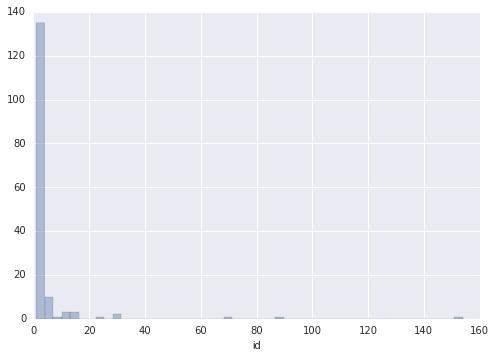

In [42]:
_ = sns.distplot(df.groupby('cognitive_contrast_cogatlas_id')['id'].count(), kde=False)

In [48]:
for i in df['modality'].unique():
    print i

nan
fMRI-BOLD
Structural MRI
Other
fMRI-CBV
MEG
Diffusion MRI
fMRI-CBF
EEG
PET other
PET FDG


In [66]:
df = df.drop(np.where(df['modality'] != 'fMRI-BOLD')[0])

In [67]:
df.shape

(9640, 132)

In [80]:
df.groupby('map_type')['modality'].count()

map_type
F map                              17
P map (given null hypothesis)     146
ROI/mask                          238
T map                            1505
Z map                            2519
anatomical                         25
multivariate-beta map              56
other                            1044
parcellation                       66
univariate-beta map              4914
Name: modality, dtype: int64

In [82]:
xt = pd.crosstab(df['modality'], df['map_type'])

In [322]:
nv = pd.read_csv('2016-09-06-neurovault_metadata.csv')
nv.shape

(14228, 132)

In [329]:
for i in nv.map_type.unique():
    print i

T map
Z map
other
anatomical
parcellation
P map (given null hypothesis)
F map
ROI/mask
nan
univariate-beta map
multivariate-beta map


In [ ]:
nv['map_type'].isin(['T map', 'Z map'])

In [313]:
wh_labeled = []
wh_labeled.append(nv['cognitive_contrast_cogatlas'].isnull())
wh_labeled.append(nv['cognitive_contrast_cogatlas'] == 'Other')
wh_labeled.append(nv['cognitive_contrast_cogatlas'] == 'None / Other')
wh_labeled.append(nv['modality'] != 'fMRI-BOLD')
wh_labeled.append(nv['map_type'].str.contains('map') == False)
wh_labeled.append(nv['map_type'])

In [ ]:
wh_unlabeled = []
wh_unlabeled.append(nv['cognitive_contrast_cogatlas'].isnull())
wh_unlabeled.append(nv['cognitive_contrast_cogatlas'] == 'Other')
wh_unlabeled.append(nv['cognitive_contrast_cogatlas'] == 'None / Other')
wh_unlabeled.append(nv['modality'] == 'fMRI-BOLD')
wh_unlabeled.append(nv['map_type'].str.contains('map'))

In [317]:
nv_old = nv.copy()
 = nv.loc[~np.any(np.array(wh_labeled), axis=0), :]
print nv.shape

(451, 132)


In [318]:
nv = nv.drop_duplicates()
print nv.shape

(359, 132)


In [319]:
x = nv['file'].iloc[0]
x.split('/')[-1]
# ${x##*/}

'task001_cope06_neg_loss_param.nii.gz'

In [320]:
# proc = subprocess.Popen(['/bin/bash'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
!rm -r images
!mkdir images
n=0
for f in nv['file']:
#     n=n+1
#     if n > 20:
#         break
    fout = f.split('/')[-1]
    print "downloading: ", fout
    subprocess.call('curl %s > images/%s' % (f, fout), shell=True)
#     subprocess.call('touch images/%s' % (fout), shell=True)
    

downloading:  task001_cope06_neg_loss_param.nii.gz
downloading:  task001_cope04_distance%20from%20indifference.nii.gz
downloading:  task001_cope02_parametric%20gain.nii.gz
downloading:  task001_cope01_task.nii.gz
downloading:  tstatsCashoutsMinusPumpMasked.nii.gz
downloading:  Fig3A_zstat1_2.nii.gz
downloading:  task001_cope01_pumps_fixed.nii.gz
downloading:  task001_cope02_pumps_demean.nii.gz
downloading:  task001_cope07_explode_fixed.nii.gz
downloading:  task001_cope04_cash_fixed.nii.gz
downloading:  task001_cope03_pumps_fixed_real_RT.nii.gz
downloading:  task001_cope01_task.nii.gz
downloading:  task002_cope02_feedback.nii.gz
downloading:  task002_cope01_task.nii.gz
downloading:  task003_cope01_classification-probabilistic.nii.gz
downloading:  task001_cope02_feedback.nii.gz
downloading:  task003_cope02_classification-deterministic.nii.gz
downloading:  task002_cope10_succstop_minus_go.nii.gz
downloading:  task002_cope08_unsucc_minus_succ_stop.nii.gz
downloading:  task002_cope09_go_cri

In [321]:
!lsi images --h -V

IMAGE                                                          DIM1  DIM2  DIM3  DIM4     VOXELS         mm^3
images/Fig3A_zstat1_2.nii.gz                                     91   109    91     1     194758   1558064.00
images/task001_cope01_pumps_fixed.nii.gz                         91   109    91     1     228397   1827176.00
images/task001_cope01_task.nii.gz                                91   109    91     1     228180   1825440.00
images/task001_cope02_feedback.nii.gz                            91   109    91     1     228180   1825440.00
images/task001_cope02_parametric%20gain.nii.gz                   91   109    91     1     228483   1827864.00
images/task001_cope02_pumps_demean.nii.gz                        91   109    91     1     228397   1827176.00
images/task001_cope03_pumps_fixed_real_RT.nii.gz                 91   109    91     1     228397   1827176.00
images/task001_cope04_cash_fixed.nii.gz                          91   109    91     1     228397   1827176.00
images/tas